In [ ]:
!pip install kagglehub

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download salader/dogsvscats


Dataset URL: https://www.kaggle.com/datasets/salader/dogsvscats
License(s): unknown
 98% 1.04G/1.06G [00:05<00:00, 208MB/s]
100% 1.06G/1.06G [00:07<00:00, 152MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogsvscats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [5]:
#Generators
trains_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


### Why we use Generators (`image_dataset_from_directory`)

Generators are used to **efficiently load and preprocess large image datasets** during training.

**Key reasons:**

* **Memory efficient**: Images are loaded in **batches**, not all at once, so large datasets don’t overflow RAM.
* **Automatic labeling**: Labels are inferred directly from folder names.
* **On-the-fly preprocessing**: Images are resized and batched during loading.
* **Faster training pipeline**: Works seamlessly with `model.fit()` for smooth data streaming.
* **Scalable**: Easily handles datasets that don’t fit entirely in memory.

In short, generators make training **faster, cleaner, and more memory-friendly** for image-based deep learning models. 🚀


In [12]:
#Normalize
def process(image,label):
    image=tf.cast(image/255. ,tf.float32)
    return image,label

trains_ds=trains_ds.map(process)
validation_ds=validation_ds.map(process)

In [13]:

model = Sequential()

#Adding layers

model.add(Conv2D(32, (3,3), activation='relu',input_shape=(256 , 256, 3)))
model.add(MaxPooling2D((2,2), strides=2, padding='valid'))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 📘 Documentation: CNN Model Architecture Explanation

This Convolutional Neural Network (CNN) model is designed for **binary image classification** using RGB images of size **256 × 256**. Each layer plays a specific role in feature extraction, dimensionality reduction, and classification.

---

## 1️⃣ Sequential Model

```python
model = Sequential()
```

### Why we use it:

* The **Sequential API** is used when layers are stacked **one after another**.
* It is simple, readable, and ideal for straightforward CNN architectures.
* Suitable when there is a **single input and single output flow**.

---

## 2️⃣ First Convolutional Layer

```python
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)))
```

### Why we use it:

* **Conv2D** extracts **low-level features** such as edges, corners, and textures.
* **32 filters** allow the model to learn 32 different feature maps.
* **3×3 kernel** is standard and effective for capturing spatial patterns.
* **ReLU activation**:

  * Introduces non-linearity
  * Speeds up training
  * Prevents vanishing gradient problems
* **input_shape=(256,256,3)**:

  * Defines input image size
  * `3` represents RGB channels

---

## 3️⃣ First Max Pooling Layer

```python
model.add(MaxPooling2D((2,2), strides=2, padding='valid'))
```

### Why we use it:

* Reduces **spatial dimensions** (height and width)
* Decreases **computational cost**
* Helps prevent **overfitting**
* Retains the **most important features**
* `(2×2)` pooling halves the image size

---

## 4️⃣ Second Convolutional Layer

```python
model.add(Conv2D(64, (3, 3), activation='relu'))
```

### Why we use it:

* Learns **more complex features** (shapes, patterns)
* Increased filters (64) allow deeper feature representation
* Builds on features learned by the first convolutional layer

---

## 5️⃣ Second Max Pooling Layer

```python
model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
```

### Why we use it:

* Further reduces spatial size
* Improves generalization
* Keeps the strongest activations

---

## 6️⃣ Third Convolutional Layer

```python
model.add(Conv2D(128, (3, 3), activation='relu'))
```

### Why we use it:

* Captures **high-level features**

  * Object parts
  * Shapes
  * Complex textures
* More filters = richer feature learning
* Essential for accurate classification

---

## 7️⃣ Third Max Pooling Layer

```python
model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))
```

### Why we use it:

* Controls feature map size
* Reduces overfitting
* Makes model more efficient

---

## 8️⃣ Flatten Layer

```python
model.add(Flatten())
```

### Why we use it:

* Converts 2D feature maps into a **1D vector**
* Required to connect convolutional layers to dense layers
* Prepares extracted features for classification

---

## 9️⃣ First Dense (Fully Connected) Layer

```python
model.add(Dense(128, activation='relu'))
```

### Why we use it:

* Learns **non-linear combinations** of extracted features
* Helps the model understand relationships between features
* ReLU improves training speed and performance

---

## 🔟 Second Dense Layer

```python
model.add(Dense(64, activation='relu'))
```

### Why we use it:

* Gradually reduces the feature space
* Improves abstraction
* Helps prevent overfitting by limiting neuron count

---

## 1️⃣1️⃣ Output Layer

```python
model.add(Dense(1, activation='sigmoid'))
```

### Why we use it:

* **Single neuron** → Binary classification
* **Sigmoid activation** outputs values between **0 and 1**
* Represents probability of the positive class
* Ideal for problems like:

  * Cat vs Dog
  * Tumor vs No Tumor
  * Yes vs No

---

## ✅ Summary

| Layer Type   | Purpose                    |
| ------------ | -------------------------- |
| Conv2D       | Feature extraction         |
| MaxPooling2D | Dimensionality reduction   |
| Flatten      | Convert features to vector |
| Dense        | Classification             |
| Sigmoid      | Binary output              |

---


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

## Overall Idea (Big Picture)

Your CNN works in **3 stages**:

1. **Feature Extraction** → `Conv2D + MaxPooling`
2. **Feature Flattening** → `Flatten`
3. **Decision Making** → `Dense layers`

Input image size is **256 × 256 × 3** (RGB).

---

## 1. Convolution Layer 1 — `Conv2D (32 filters)`

**Output:** `(254, 254, 32)`
**Parameters:** `896`

### What it does

* Detects **basic features** like edges, corners, textures
* Applies **32 filters** (kernels)

### Math behind it

Each filter size = **3 × 3 × 3**

[
\text{Params per filter} = (3×3×3) + 1 = 28
]

[
\text{Total params} = 28 × 32 = 896
]

### Output size formula

[
\text{Output} = (N - F + 1)
]

[
256 - 3 + 1 = 254
]

So output shape:
[
254 × 254 × 32
]

---

## 2. Max Pooling 1 — `MaxPooling2D`

**Output:** `(127, 127, 32)`
**Parameters:** `0`

### What it does

* Reduces spatial size
* Keeps **important features**
* Reduces computation

### Math

Uses **2×2 window**:

[
127 = 254 ÷ 2
]

No trainable parameters.

---

## 3. Convolution Layer 2 — `Conv2D (64 filters)`

**Output:** `(125, 125, 64)`
**Parameters:** `18,496`

### What it does

* Learns **more complex features**
* Uses information from previous 32 feature maps

### Math

Filter size = `3 × 3 × 32`

[
(3×3×32) + 1 = 289
]

[
289 × 64 = 18,496
]

Output size:
[
127 - 3 + 1 = 125
]

---

## 4. Max Pooling 2 — `MaxPooling2D`

**Output:** `(62, 62, 64)`
**Parameters:** `0`

### Why

* Further reduces image size
* Controls overfitting

[
125 ÷ 2 ≈ 62
]

---

## 5. Convolution Layer 3 — `Conv2D (128 filters)`

**Output:** `(60, 60, 128)`
**Parameters:** `73,856`

### What it learns

* **High-level features** (object parts, shapes)

### Math

Filter size = `3 × 3 × 64`

[
(3×3×64) + 1 = 577
]

[
577 × 128 = 73,856
]

---

## 6. Max Pooling 3 — `MaxPooling2D`

**Output:** `(30, 30, 128)`
**Parameters:** `0`

Reduces spatial size while keeping strongest activations.

---

## 7. Flatten Layer — `Flatten`

**Output:** `(115,200)`
**Parameters:** `0`

### What it does

Converts 3D feature maps into 1D vector.

[
30 × 30 × 128 = 115,200
]

This is required before feeding into Dense layers.

---

## 8. Dense Layer 1 — `Dense (128 neurons)`

**Output:** `(128)`
**Parameters:** `14,745,728`

### What it does

* Learns **global relationships**
* Combines all extracted features

### Math

[
115,200 × 128 + 128 = 14,745,728
]

⚠️ **This layer has the most parameters**
Main reason CNNs can overfit.

---

## 9. Dense Layer 2 — `Dense (64 neurons)`

**Output:** `(64)`
**Parameters:** `8,256`

### Math

[
128 × 64 + 64 = 8,256
]

Helps refine features before final prediction.

---

## 10. Output Layer — `Dense (1 neuron)`

**Output:** `(1)`
**Parameters:** `65`

### What it does

* Outputs a **single probability**
* Uses **sigmoid activation**

### Math

[
64 × 1 + 1 = 65
]

[
\text{Output} = \sigma(z) = \frac{1}{1+e^{-z}}
]

---

## Why Binary Classification?

* Output neuron = `1`
* Loss = `binary_crossentropy`
* Output range = `[0,1]`

Example:

* `0.87` → Class 1
* `0.12` → Class 0

---

## Total Parameters Summary

| Layer Type         | Parameters |
| ------------------ | ---------- |
| Convolution Layers | ~93K       |
| Dense Layers       | ~14.75M    |
| **Total**          | **14.8M**  |

👉 Most parameters come from **Dense layers**, not Conv layers.

---

## How Learning Happens (Training Flow)

1. Forward pass → predictions
2. Loss calculation
3. Backpropagation
4. Weight updates via **Adam optimizer**
5. Repeat for each batch

---

## In One Line (Exam Gold ⭐)

> CNN extracts features using convolution and pooling layers, flattens them, and uses dense layers to classify images based on learned patterns.



In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

## Model Compilation: Optimizer, Loss Function, and Metrics

```python
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
```

The `compile()` method configures the learning process of a neural network. It defines **how the model learns**, **what it learns**, and **how its performance is measured**.

---

## 1. Optimizer

**Purpose:**
Optimizers update the model’s weights to **minimize the loss function** during training.

### Why we use an Optimizer

* Controls **how fast and how accurately** the model learns
* Adjusts weights using gradients from backpropagation
* Helps reach optimal solutions efficiently

### Common Optimizers

| Optimizer   | Why it’s used                                           |
| ----------- | ------------------------------------------------------- |
| **SGD**     | Simple, stable, good for large datasets                 |
| **Adam**    | Fast convergence, adaptive learning rate (most popular) |
| **RMSprop** | Good for recurrent and CNN models                       |
| **Adagrad** | Works well with sparse data                             |
| **AdamW**   | Adam with better regularization                         |

### Why **Adam**

* Combines **momentum + adaptive learning rate**
* Works well for most CNN and deep learning tasks
* Requires minimal tuning

---

## 2. Loss Function

**Purpose:**
The loss function measures **how wrong the model’s predictions are**.

### Why we use a Loss Function

* Guides the optimizer during training
* Lower loss = better predictions
* Determines how gradients are calculated

### Common Loss Functions

| Loss Function                       | Used When                              |
| ----------------------------------- | -------------------------------------- |
| **binary_crossentropy**             | Binary classification (2 classes)      |
| **categorical_crossentropy**        | Multi-class (one-hot labels)           |
| **sparse_categorical_crossentropy** | Multi-class (integer labels)           |
| **mean_squared_error (MSE)**        | Regression problems                    |
| **mean_absolute_error (MAE)**       | Regression, less sensitive to outliers |
| **hinge loss**                      | SVM-style classifiers                  |

### Why **binary_crossentropy**

* Used for **binary classification**
* Suitable when output layer has **1 neuron with sigmoid**
* Penalizes confident wrong predictions heavily

📌 Example use cases:

* Cat vs Dog
* Normal vs Diseased
* Spam vs Not Spam

---

## 3. Metrics

**Purpose:**
Metrics are used to **evaluate model performance** during training and validation.

### Why we use Metrics

* Easy-to-understand performance indicators
* Do **not** affect training (only for monitoring)
* Help compare different models

### Common Metrics

| Metric        | Meaning                            |
| ------------- | ---------------------------------- |
| **accuracy**  | Percentage of correct predictions  |
| **precision** | Correct positive predictions       |
| **recall**    | Ability to find all positives      |
| **F1-score**  | Balance between precision & recall |
| **AUC**       | Classification confidence          |
| **MSE / MAE** | Regression evaluation              |

### Why **accuracy**

* Simple and intuitive
* Works well when classes are **balanced**
* Good first metric for classification tasks

---

## Summary (One-Glance)

| Component     | Purpose               | Selected Value      |
| ------------- | --------------------- | ------------------- |
| Optimizer     | Updates weights       | Adam                |
| Loss Function | Measures error        | Binary Crossentropy |
| Metric        | Evaluates performance | Accuracy            |

---

### In Simple Words

* **Optimizer** → *How the model learns*
* **Loss** → *What the model tries to minimize*
* **Metrics** → *How we judge performance*



In [16]:
history=model.fit(trains_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 80ms/step - accuracy: 0.5050 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.4955 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.4968 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.4980 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.4924 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 76ms/step - accuracy: 0.4977 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.4995 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.4956 - loss: 0.6932 - 

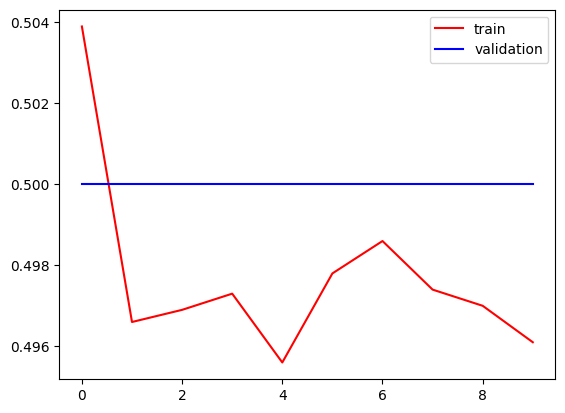

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
##Ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
#L1/L2 Regularizer
# Dropout
# Batch Norm
#Reduce complexity

###New Model to reduce overfittig

In [19]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
history2=model.fit(trains_ds, validation_data=validation_ds, epochs=10)

ValueError: You must call `compile()` before using the model.

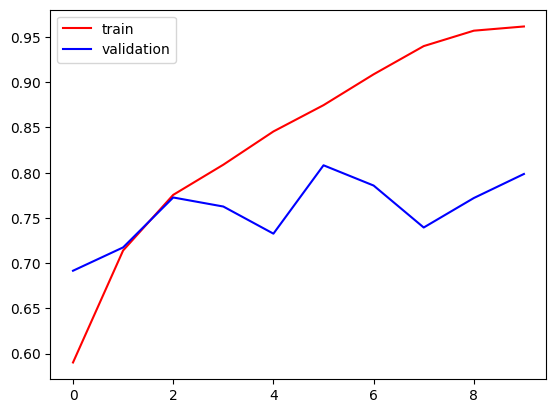

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history2.history['accuracy'], color='red', label='train')
plt.plot(history2.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

###Prediction from external source data

In [20]:
import cv2

In [26]:
test_img = cv2.imread('/content/train/dogs/dog.1000.jpg')

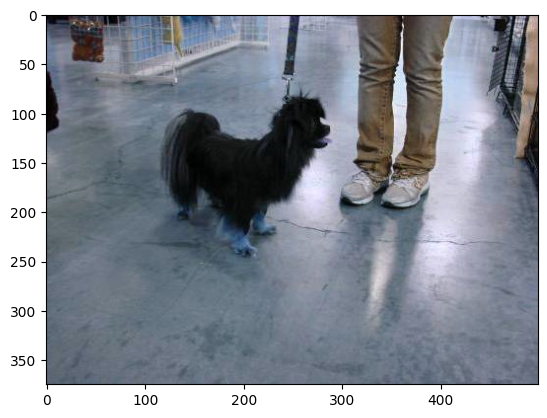

In [27]:
plt.imshow(test_img)

In [28]:
test_img = cv2.resize(test_img, (256, 256))
test_input = test_img.reshape((1, 256, 256, 3))

In [29]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.0780371e-15]], dtype=float32)